In [1]:
#Import needed libraries
import os
import datetime
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from datetime import datetime as dt
%matplotlib inline

#Load data
df = pd.read_excel("ToF_BoF_CVR_Dataset.xlsx", sheet_name = 'Weekly')
df2 = pd.read_excel("ToF_BoF_CVR_Dataset.xlsx", sheet_name = 'Dayly')

#Calculate bps for TOF
df['CVR_Impact'] = df['CVR'].transform(lambda x: x.diff())*100
df['TOF_BPS'] = df['TOF'].transform(lambda x: x.diff())*100
df['BOF_BPS'] = df['BOF'].transform(lambda x: x.diff())*100
df.sort_index(inplace=True)

#Calculate bps for BOF
df2['CVR_Impact'] = df2['CVR'].transform(lambda x: x.diff())*100
df2['TOF_BPS'] = df2['TOF'].transform(lambda x: x.diff())*100
df2['BOF_BPS'] = df2['BOF'].transform(lambda x: x.diff())*100
df2.sort_index(inplace=True)

In [2]:
#View few rows
df.head()

,Date,TOF,BOF,CVR,CVR_Impact,TOF_BPS,BOF_BPS
0,2020-02-02,0.028686,0.371341,0.010652,NaN,NaN,NaN
1,2020-02-09,0.027121,0.359975,0.009763,-0.088917,-0.156430,-1.136671
2,2020-02-16,0.026712,0.367484,0.009816,0.005345,-0.040878,0.750950
3,2020-02-23,0.027379,0.373661,0.010231,0.041414,0.066679,0.617627
4,2020-03-01,0.028887,0.379878,0.010974,0.074302,0.150787,0.621706


In [3]:
round(df.TOF_BPS.max(),2),round(df.BOF_BPS.max(),2)

(1.62, 2.21)

In [4]:
df.shape,df2.shape

((31, 7), (235, 7))

In [34]:
df.to_excel('ToF_BoF_Weekly.xlsx',index=False)
df2.to_excel('ToF_BoF_Dayly.xlsx',index=False)

In [5]:
#10 basis point (0.1) - TOF Weekly 
tof_weekly = df[["Date","TOF","TOF_BPS","CVR","CVR_Impact"]]
tof_10bps_weekly = tof_weekly[(tof_weekly['TOF_BPS'] >= 0.1) & (tof_weekly['TOF_BPS'] <= 0.15)]

#10 basis point (0.1) - BOF Weekly
bof_weekly = df[["Date","BOF","BOF_BPS","CVR","CVR_Impact"]]
bof_10bps_weekly = bof_weekly[(bof_weekly['BOF_BPS'] >= 0.1) & (bof_weekly['BOF_BPS'] <= 0.15)]

#10 basis point (0.1) - TOF Dayly
tof_dayly = df2[["Date","TOF","TOF_BPS","CVR","CVR_Impact"]]
tof_10bps_dayly = tof_dayly[(tof_dayly['TOF_BPS'] >= 0.1) & (tof_dayly['TOF_BPS'] <= 0.15)]

#10 basis point (0.1) - BOF Daily
bof_dayly = df2[["Date","BOF","BOF_BPS","CVR","CVR_Impact"]]
bof_10bps_dayly = bof_dayly[(bof_dayly['BOF_BPS'] >= 0.1) & (bof_dayly['BOF_BPS'] <= 0.15)]

In [6]:
round(tof_10bps_weekly.TOF_BPS.min(),2),round(bof_10bps_weekly.BOF_BPS.min(),2)

(0.13, 0.12)

In [7]:
round(tof_10bps_dayly.TOF_BPS.min(),2),round(bof_10bps_dayly.BOF_BPS.min(),2)

(0.1, 0.14)

In [8]:
round(tof_10bps_weekly.TOF_BPS.max(),2),round(bof_10bps_weekly.BOF_BPS.max(),2)

(0.13, 0.13)

In [9]:
round(tof_10bps_dayly.TOF_BPS.max(),2),round(bof_10bps_dayly.BOF_BPS.max(),2)

(0.14, 0.15)

In [10]:
tof_10bps_weekly

,Date,TOF,TOF_BPS,CVR,CVR_Impact
29,2020-09-06,0.049504,0.128398,0.014866,0.032845


In [11]:
bof_10bps_weekly

,Date,BOF,BOF_BPS,CVR,CVR_Impact
8,2020-03-29,0.298040,0.121054,0.019375,0.215055
11,2020-04-19,0.296669,0.129527,0.019213,0.084395


In [12]:
bof_10bps_dayly

,Date,BOF,BOF_BPS,CVR,CVR_Impact
104,2020-05-16,0.092302,0.148576,0.019844,0.374662
112,2020-05-24,0.286422,0.138428,0.020130,0.120900


In [13]:
dataset = pd.read_excel("ToF_BoF_Dayly.xlsx", sheet_name = 'BoF')
dataset2 = pd.read_excel("ToF_BoF_Dayly.xlsx", sheet_name = 'ToF')

corr_TOF = dataset2[['TOF_BPS','CVR_Impact']]
corr_BOF = dataset[['BOF_BPS','CVR_Impact']]

In [14]:
round(corr_TOF.corr(),2)

,TOF_BPS,CVR_Impact
TOF_BPS,1.00,0.69
CVR_Impact,0.69,1.00


In [15]:
round(corr_BOF.corr(),2)

,BOF_BPS,CVR_Impact
BOF_BPS,1.00,0.35
CVR_Impact,0.35,1.00


# Build Models for Prediction

In [16]:
#Stats Model - osl algorithm
import statsmodels.formula.api as sm
dataset = pd.read_excel("ToF_BoF_Dayly.xlsx", sheet_name = 'BoF')
dataset2 = pd.read_excel("ToF_BoF_Dayly.xlsx", sheet_name = 'ToF')
df_ToF = dataset2[['TOF_BPS', 'CVR_Impact']]
df_ToF_log = np.log(df_ToF)
result2 = sm.ols(formula = 'CVR_Impact ~ TOF_BPS',data = df_ToF_log ).fit()
#result.params
#result.summary()

In [17]:
result2.params

Intercept   -5.920873
TOF_BPS      0.902083
dtype: float64

In [26]:
round(result.rsquared,2),round(result2.rsquared,2)

(0.03, 0.6)

C:\Users\bagabi\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:16: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  app.launch_new_instance()


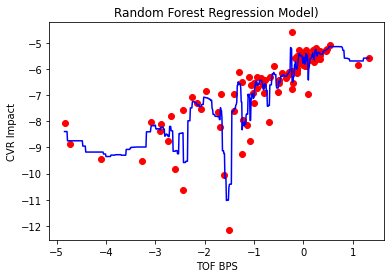

In [18]:
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import explained_variance_score,r2_score

dataset = pd.read_excel("ToF_BoF_Dayly.xlsx", sheet_name = 'BoF')
dataset2 = pd.read_excel("ToF_BoF_Dayly.xlsx", sheet_name = 'ToF')

X = dataset2[["TOF_BPS"]].values
y = dataset2[['CVR_Impact']].values

X = np.log(X)
y = np.log(y)

#Fit a random forest algorithm
rf_TOF = RandomForestRegressor(n_estimators=1000, random_state=42)
rf_TOF.fit(X,y)

#4 Visualising the Regression results (for higher resolution and smoother curve)
X_grid = np.arange(min(X), max(X), 0.01)
X_grid = X_grid.reshape((len(X_grid), 1))
plt.scatter(X, y, color = 'red')
plt.plot(X_grid, rf_TOF.predict(X_grid), color = 'blue')
plt.title('Random Forest Regression Model)')
plt.xlabel('TOF BPS')
plt.ylabel('CVR Impact')
plt.show()

In [45]:
accuracy_ToF = round(rf_TOF.score(X, y),2)
accuracy_ToF

0.93

In [23]:
y_predToF_100bps = np.exp(rf_TOF.predict([[-2.3025850929940455]]))*100
y_predToF_100bps

array([0.0341821])

In [28]:
b = np.exp(0)
b

1.0

In [22]:
log = np.log(0.1)
log

-2.3025850929940455

In [20]:
df = dataset2.copy()
predict_TOF = rf_TOF.predict(X)
df['log_prediction_cvr'] = predict_TOF
df['prediction_cvr'] = np.exp(df['log_prediction_cvr'])
df['TOF_BPS'] = df['TOF_BPS']*100
df['CVR_BPS'] = df['prediction_cvr']*10000
df.head()

,Date,TOF,TOF_BPS,CVR,CVR_Impact,log_prediction_cvr,prediction_cvr,CVR_BPS
0,2020-02-08,0.034079,95.071826,0.012902,0.003906,-5.507914,0.004055,40.545574
1,2020-02-09,0.038468,43.884574,0.014262,0.001360,-6.608972,0.001348,13.482172
2,2020-02-14,0.021966,0.889809,0.007724,0.000138,-8.747066,0.000159,1.589269
3,2020-02-15,0.032928,109.621585,0.011931,0.004207,-5.807271,0.003006,30.056214
4,2020-02-16,0.035651,27.225257,0.014123,0.002192,-6.588928,0.001376,13.755137


C:\Users\bagabi\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:11: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  # This is added back by InteractiveShellApp.init_path()


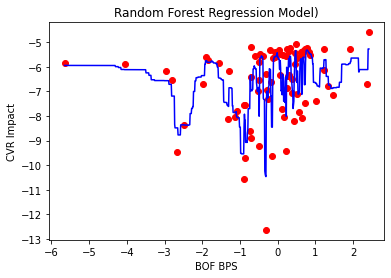

In [71]:
dataset = pd.read_excel("ToF_BoF_Dayly.xlsx", sheet_name = 'BoF')

X = dataset[["BOF_BPS"]].values
y = dataset[['CVR_Impact']].values

X = np.log(X)
y = np.log(y)

#Fit a random forest algorithm
rf_BOF = RandomForestRegressor(n_estimators=1000, random_state=42)
rf_BOF.fit(X,y)

#4 Visualising the Regression results (for higher resolution and smoother curve)
X_grid = np.arange(min(X), max(X), 0.01)
X_grid = X_grid.reshape((len(X_grid), 1))
plt.scatter(X, y, color = 'red')
plt.plot(X_grid, rf_BOF.predict(X_grid), color = 'blue')
plt.title('Random Forest Regression Model)')
plt.xlabel('BOF BPS')
plt.ylabel('CVR Impact')
plt.show()

In [47]:
#Check moedl accuracy for dayly dataset - Random Forest Algorithm
accuracy_BoF = round(rf_BOF.score(X, y),2)
accuracy_BoF

0.8

In [91]:
y_predBoF_10bps = np.exp(rf_BOF.predict([[0.0]]))*100
y_predBoF_10bps

array([0.36793003])

In [90]:
log = np.log(1)
log

0.0

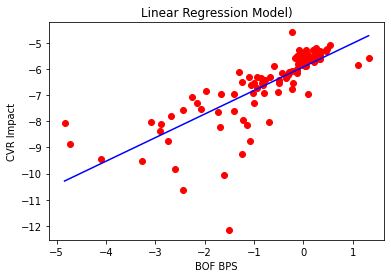

In [73]:
from sklearn.svm import SVR
from sklearn.ensemble import AdaBoostRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import explained_variance_score,r2_score

dataset = pd.read_excel("ToF_BoF_Dayly.xlsx", sheet_name = 'BoF')
dataset2 = pd.read_excel("ToF_BoF_Dayly.xlsx", sheet_name = 'ToF')

X = dataset2[["TOF_BPS"]].values
y = dataset2[['CVR_Impact']].values

X = np.log(X)
y = np.log(y)

# Fit a Linear Regression Model
reg = LinearRegression().fit(X, y)

#4 Visualising the Regression results (for higher resolution and #smoother curve)
X_grid = np.arange(min(X), max(X), 0.01)
X_grid = X_grid.reshape((len(X_grid), 1))
plt.scatter(X, y, color = 'red')
plt.plot(X_grid, reg.predict(X_grid), color = 'blue')
plt.title('Linear Regression Model)')
plt.xlabel('BOF BPS')
plt.ylabel('CVR Impact')
plt.show()

In [72]:
#Linear Regression accuracy
lr_ToF = round(reg.score(X, y),2)
lr_ToF

0.6

In [44]:
reg.coef_,reg.intercept_

(array([[0.90208314]]), array([-5.92087289]))

In [74]:
from sklearn import linear_model
from sklearn.linear_model import SGDRegressor

X = dataset2[["TOF_BPS"]].values
y = dataset2[['CVR_Impact']].values

X = np.log(X)
y = np.log(y)
sgd = SGDRegressor(max_iter=1000, tol=1e-3)
sgd.fit(X, y)

C:\Users\bagabi\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


SGDRegressor()

In [75]:
round(sgd.score(X, y),2)

0.59

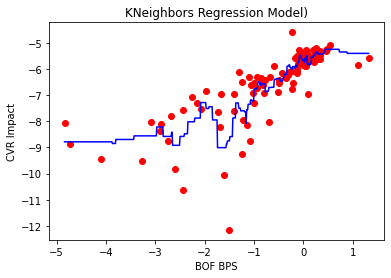

In [19]:
from sklearn.neighbors import KNeighborsRegressor

dataset = pd.read_excel("ToF_BoF_Dayly.xlsx", sheet_name = 'BoF')
dataset2 = pd.read_excel("ToF_BoF_Dayly.xlsx", sheet_name = 'ToF')

X = dataset2[["TOF_BPS"]].values
y = dataset2[['CVR_Impact']].values

X = np.log(X)
y = np.log(y)

#regressor = LinearRegression()
model2 = KNeighborsRegressor().fit(X, y)

#4 Visualising the Regression results (for higher resolution and #smoother curve)
X_grid = np.arange(min(X), max(X), 0.01)
X_grid = X_grid.reshape((len(X_grid), 1))
plt.scatter(X, y, color = 'red')
plt.plot(X_grid, model2.predict(X_grid), color = 'blue')
plt.title('KNeighbors Regression Model)')
plt.xlabel('BOF BPS')
plt.ylabel('CVR Impact')
plt.show()

In [47]:
#KNeighbors Regression accuracy
kn_ToF = round(model2.score(X, y),2)
kn_ToF

0.74

In [54]:
# importing libraries for polynomial transform
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import Pipeline

dataset = pd.read_excel("ToF_BoF_Dayly.xlsx", sheet_name = 'BoF')
dataset2 = pd.read_excel("ToF_BoF_Dayly.xlsx", sheet_name = 'ToF')

x = dataset2[["TOF_BPS"]].values
y = dataset2[['CVR_Impact']].values

x = np.log(x)
y = np.log(y)

#x = x.dropna()
#y = y.dropna()

lm=LinearRegression()
lm.fit(x.reshape(-1,1),y.reshape(-1,1))

#Creating pipeline and fitting it on data
Input=[('polynomial',PolynomialFeatures(degree=2)),('modal',LinearRegression())]
pipe=Pipeline(Input)
pipe.fit(x.reshape(-1,1),y.reshape(-1,1))

Pipeline(steps=[('polynomial', PolynomialFeatures()),
                ('modal', LinearRegression())])

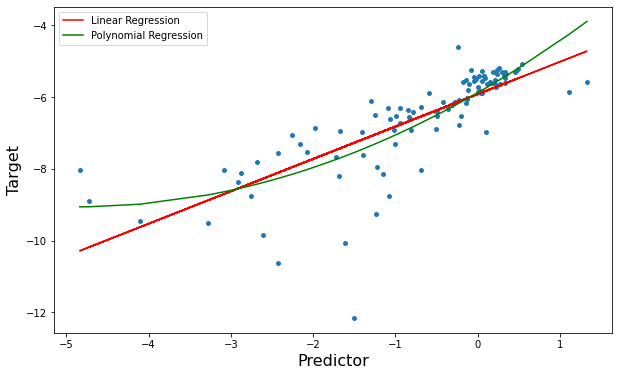

In [55]:
y_pred=lm.predict(x.reshape(-1,1))
poly_pred=pipe.predict(x.reshape(-1,1))

#sorting predicted values with respect to predictor
sorted_zip = sorted(zip(x,poly_pred))
x_poly, poly_pred = zip(*sorted_zip)

#plotting predictions
plt.figure(figsize=(10,6))
plt.scatter(x,y,s=15)
plt.plot(x,y_pred,color='r',label='Linear Regression')
plt.plot(x_poly,poly_pred,color='g',label='Polynomial Regression')
plt.xlabel('Predictor',fontsize=16)
plt.ylabel('Target',fontsize=16)
plt.legend()
plt.show()

In [57]:
from sklearn.metrics import mean_squared_error
print('RMSE for Linear Regression=>',np.sqrt(mean_squared_error(y,y_pred)))

RMSE for Linear Regression=> 0.8741783673749787


In [58]:
print('RMSE for Polynomial Regression=>',np.sqrt(mean_squared_error(y,poly_pred)))

RMSE for Polynomial Regression=> 1.7657699416939754
